# First Neurons

In [2]:
import numpy as np
import tensorflow as tf

** Set Random Seeds for same results **

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

** Data Setup **

In [9]:
np.random.seed(101)
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

### Placeholders

In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)


### Operations

In [11]:
"""
These add_op and multi_op are like lambda expressions in Python
They take a and b value on the run time and return the result
"""
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b)


### Running Sessions  to create Graphs with Feed Dictionaries

In [14]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b}) # a and b value passed as rand_a and rand_b
    print("add_result: \n{}".format(add_result))
    
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print("mult_result: \n{}".format(mult_result))

add_result: 
[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


mult_result: 
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Example Neural Network

In [28]:
n_features = 10
n_dense_neurons = 3

In [29]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))

In [30]:
# Variables for weight, W and bias, b
b = tf.Variable(tf.ones([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

** Operation Activation Function **

In [31]:
xW = tf.matmul(x,W)

In [32]:
z = tf.add(xW,b)

In [33]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

** Variable Intializer! **

In [34]:
init = tf.global_variables_initializer()

In [35]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [36]:
print(layer_out)

[[0.9407087  0.86090285 0.71553475]]


We still need to finish off this process with optimization! Let's learn how to do this next.

_____

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [67]:
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [69]:
x_data

array([-1.05806516e+00, -8.67569329e-04,  3.55439037e+00,  2.88763613e+00,
        5.14514728e+00,  6.79722414e+00,  7.26962915e+00,  7.44337159e+00,
        1.02156668e+01,  1.07094740e+01])

In [70]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

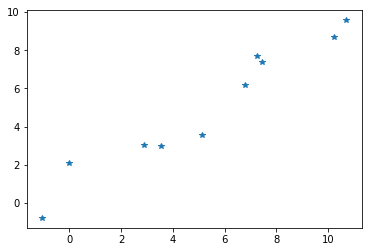

In [96]:
plt.plot(x_data,y_label,'*')

** Variables **

In [72]:
random_val = np.random.rand(2)

In [73]:
m = tf.Variable(random_val[0])
b = tf.Variable(random_val[1])

### Cost Function

In [87]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b  #Our predicted value
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


### Optimizer

In [88]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [89]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [90]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 1000
    for i in range(epochs):
        sess.run(train)
    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [91]:
final_slope

0.8185021998997828

In [92]:
final_intercept

0.7062893759707455

### Evaluate Results

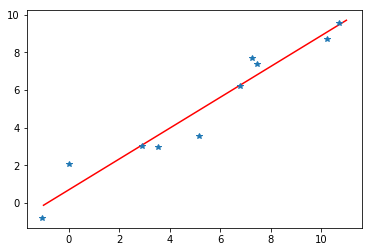

In [93]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Great Job!